In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [129]:
plot_dir = Path('../plots')
path_df = Path('../data/CLEAN_cold_box_flips_flipping_meta.csv')
df = pd.read_csv(path_df)
df = df[df['id'] != 'p10'] ## no week 1 data
df = df[df['id'] != 'i7'] ## no week 1 data
df

,run,week,cohort,id,eating_before,sleeping_before,date,area,radius
0,R1,W1,p,p6,m,n,11/12/2023,13618.946075,94.202299
1,R1,W1,p,p9,y,n,11/12/2023,11971.778870,90.145847
3,R1,W1,p,p12,n,n,11/12/2023,24971.828461,126.729850
4,R1,W1,i,i3,n,m,11/12/2023,25452.117920,132.826348
6,R1,W1,i,i8,n,m,11/12/2023,23385.906219,124.271877
7,R1,W1,i,i11,y,n,11/12/2023,18096.275330,108.450074
8,R1,W2,p,p6,n,m,11/19/2023,16229.915619,94.796303
9,R1,W2,p,p9,n,n,11/19/2023,14237.842560,99.298641
11,R1,W2,p,p12,n,n,11/19/2023,32711.257935,147.755973
12,R1,W2,i,i3,n,n,11/19/2023,29632.892609,146.460092


In [130]:
px_to_in = (1036.8 / 2) ## 1036.8 px is 2 inches
px_to_mm = px_to_in / 25.4 ## 1 inch is 25.4 mm
## to convert px to mm divide by px_to_mm

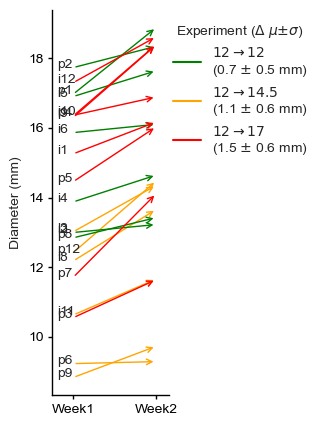

In [131]:
run_colors_dict = {'R1': 'orange', 'R2':'green', 'R3':'red'}
run_keys = {'R1':r'$12 \to 14.5$',
            'R2':r'$12 \to 12$',
            'R3':r'$12 \to 17$'}

fig, ax = plt.subplots(1,1,figsize=(1.5,5))

diameter_diffs = []
diameters = []
percent_change_diameters = {R:{} for R in ['R1', 'R2', 'R3']}
diff_by_runs = {key:[] for key in ['R1', 'R2', 'R3']}
for id in df['id'].unique():
    tmp = df[df['id'] == id]
    if tmp.shape[0] > 1:
        diameter = []
        for W in ['W1', 'W2']:
            r = tmp[tmp['week'] == W]['radius'].values[0]
            d = r / px_to_mm * 2
            diameter.append(d)
        run = tmp[tmp['week'] == 'W2']['run'].values[-1]
        run_color = run_colors_dict[run]
        diameters.append(diameter)
        diameter_diff = diameter[1] - diameter[0]
        diameter_diffs.append(diameter_diff)
        diff_by_runs[run].append(diameter_diff)
        
        percent_change = ((diameter[1] - diameter[0]) / diameter[0]) * 100
        percent_change_diameters[run][id] = percent_change
        
        ax.plot([0,1], diameter, alpha=0)
        ## add arrow instead of plot
        ax.annotate('', xy=(1, diameter[1]), xytext=(0, diameter[0]),
                    arrowprops=dict(arrowstyle='->', lw=1, color=run_color))
        
        ax.text(-.2, diameter[0], id)
    else:
        print(id)

ax.set_xlim(-.25, 1.15)

# Turn on a grid
ax.grid(False)#, linestyle='--', alpha=0.5, zorder=0)

# Force tick marks to appear and be visible
ax.tick_params(axis='both', which='major', direction='out',
               length=3, width=1, colors='black', bottom=True, left=True)

# Make spines visible and in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)
    spine.set_alpha(1)
    
## turn off top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

xticks = [0,1]
xticklabels = ['Week1', 'Week2']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

ax.set_ylabel('Diameter (mm)')

## custom legend color runs
for run in ['R2', 'R1', 'R3']:
    avg_diff = np.mean(diff_by_runs[run])
    std_diff = np.std(diff_by_runs[run])
    ax.plot([], [], color=run_colors_dict[run], label=f'{run_keys[run]}\n({avg_diff:.1f} $\pm$ {std_diff:.1f} mm)')
ax.legend(title='Experiment ($\Delta$ $\mu$$\pm$$\sigma$)', loc='upper right', bbox_to_anchor=(2.3, 1), frameon=False)

plt.show()
plt.close()

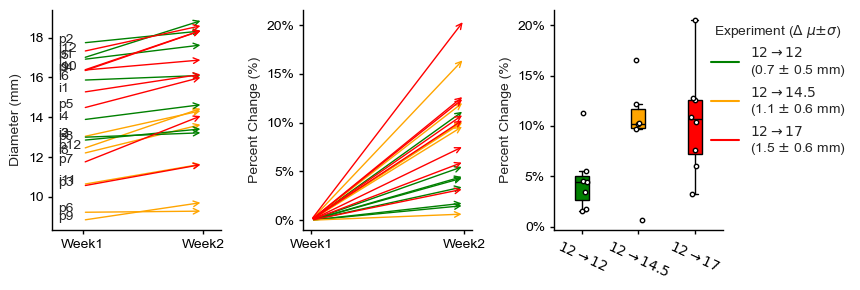

In [135]:
fig, axs = plt.subplots(1,3,figsize=(9,3))

## show raw data
ax=axs[0]
diameter_diffs = []
diameters = []
percent_change_diameters = {R:{} for R in ['R1', 'R2', 'R3']}
diff_by_runs = {key:[] for key in ['R1', 'R2', 'R3']}
for id in df['id'].unique():
    tmp = df[df['id'] == id]
    if tmp.shape[0] > 1:
        diameter = []
        for W in ['W1', 'W2']:
            r = tmp[tmp['week'] == W]['radius'].values[0]
            d = r / px_to_mm * 2
            diameter.append(d)
        run = tmp[tmp['week'] == 'W2']['run'].values[-1]
        run_color = run_colors_dict[run]
        diameters.append(diameter)
        diameter_diff = diameter[1] - diameter[0]
        diameter_diffs.append(diameter_diff)
        diff_by_runs[run].append(diameter_diff)
        
        percent_change = ((diameter[1] - diameter[0]) / diameter[0]) * 100
        percent_change_diameters[run][id] = percent_change
        
        ax.plot([0,1], diameter, alpha=0)
        ## add arrow instead of plot
        ax.annotate('', xy=(1, diameter[1]), xytext=(0, diameter[0]),
                    arrowprops=dict(arrowstyle='->', lw=1, color=run_color))
        
        ax.text(-.2, diameter[0], id)
    else:
        print(id)

ax.set_xlim(-.25, 1.15)

# Turn on a grid
ax.grid(False)#, linestyle='--', alpha=0.5, zorder=0)
# Force tick marks to appear and be visible
ax.tick_params(axis='both', which='major', direction='out',
               length=3, width=1, colors='black', bottom=True, left=True)
# Make spines visible and in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)
    spine.set_alpha(1)
## turn off top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
xticks = [0,1]
xticklabels = ['Week1', 'Week2']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel('Diameter (mm)')

## show percent change as arrow plot
ax=axs[1]
for run in ['R2', 'R1', 'R3']:
    for id in percent_change_diameters[run].keys():
        percent_change = percent_change_diameters[run][id]
        xs = [0,1]
        ys = [0, percent_change]
        ax.plot(xs, ys, color=run_colors_dict[run], alpha=0)
        ax.annotate('', xy=(1, percent_change), xytext=(0, 0),
                    arrowprops=dict(arrowstyle='->', lw=1, color=run_colors_dict[run]))
        
# Turn on a grid
ax.grid(False)#, linestyle='--', alpha=0.5, zorder=0)
# Force tick marks to appear and be visible
ax.tick_params(axis='both', which='major', direction='out',
               length=3, width=1, colors='black', bottom=True, left=True)
# Make spines visible and in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)
    spine.set_alpha(1)
## turn off top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
xticks = [0,1]
xticklabels = ['Week1', 'Week2']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

yticks = [0, 5, 10, 15, 20]
ax.set_yticks(yticks)
ax.set_yticklabels([f'{y}%' for y in yticks])

ax.set_ylabel('Percent Change (%)')

## show percent changes as box plots
ax=axs[2]
xticks = [0,1,2]
xticklabels = [run_keys[run] for run in ['R2', 'R1', 'R3']]

for i, run in enumerate(['R2', 'R1', 'R3']):
    x = i
    y = list(percent_change_diameters[run].values())
    flierprops = dict(marker='o', markerfacecolor='black', markersize=3, linestyle='none', alpha=0)
    ax.boxplot(y, positions=[x], widths=0.25, patch_artist=True, boxprops=dict(facecolor=run_colors_dict[run], color='black'),
               medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'),
               flierprops=flierprops)
    ## add randomly jittered points that are white with black border
    x_jitter = np.random.normal(x, 0.05, len(y))
    ax.scatter(x_jitter, y, color='white', edgecolor='black', s=10, zorder=10, alpha=1)
    

# Turn on a grid
ax.grid(False)#, linestyle='--', alpha=0.5, zorder=0)
# Force tick marks to appear and be visible
ax.tick_params(axis='both', which='major', direction='out',
               length=3, width=1, colors='black', bottom=True, left=True)
# Make spines visible and in black
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)
    spine.set_alpha(1)
## turn off top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
xticks = [0,1,2]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=-25, ha='center')

yticks = [0, 5, 10, 15, 20]
ax.set_yticks(yticks)
ax.set_yticklabels([f'{y}%' for y in yticks])

ax.set_ylabel('Percent Change (%)')

## custom legend color runs
for run in ['R2', 'R1', 'R3']:
    avg_diff = np.mean(diff_by_runs[run])
    std_diff = np.std(diff_by_runs[run])
    ax.plot([], [], color=run_colors_dict[run], label=f'{run_keys[run]}\n({avg_diff:.1f} $\pm$ {std_diff:.1f} mm)')
ax.legend(title='Experiment ($\Delta$ $\mu$$\pm$$\sigma$)', loc='upper right', bbox_to_anchor=(1.8, 1), frameon=False)

fig.tight_layout()

name_fig = 'diameter_change_flipping.png'
path_fig = plot_dir / name_fig
fig.savefig(path_fig, dpi=300, bbox_inches='tight')

plt.show()
plt.close()